In [216]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import warnings; warnings.simplefilter('ignore')
from scipy.stats import ttest_ind
from itertools import combinations
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import sweetviz as sv

df = pd.read_csv('stud_math.xls')

# Functions

In [190]:
def nan_fill(x): # function replaces missing values in the whole dataframe
    for column in df.columns:
        if df[column].dtype == float:
            df[column] = df[column].replace(np.nan, df[column].median())
        elif df[column].dtype == object:
            df[column] = df[column].replace(np.nan,
                                            df[column].value_counts().idxmax(), regex=True)
    return x

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [226]:
df.sample(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
355,MS,F,18,U,GT3,T,3.0,3.0,services,services,course,father,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,NaN,3.0,4.0,5.0,0.0,45.0
365,MS,M,18,R,GT3,T,1.0,3.0,at_home,NaN,course,NaN,2.0,2.0,0.0,no,yes,yes,no,NaN,-6.0,yes,no,no,3.0,3.0,4.0,3.0,4.0,50.0
259,GP,F,17,U,LE3,T,2.0,NaN,services,services,course,father,1.0,4.0,0.0,no,no,yes,yes,yes,-12.0,yes,NaN,yes,3.0,4.0,1.0,NaN,0.0,0.0
214,GP,F,17,R,LE3,T,4.0,4.0,services,other,other,mother,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,no,no,5.0,2.0,1.0,3.0,12.0,50.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
180,GP,M,16,U,GT3,T,4.0,NaN,teacher,other,home,mother,1.0,2.0,0.0,no,NaN,yes,yes,yes,-6.0,yes,yes,no,3.0,4.0,3.0,3.0,10.0,40.0


In [227]:
df.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                   float64
Fedu                   float64
Mjob                    object
Fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [228]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [203]:
df.nunique(axis=0)

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

In [229]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) 
# formating each row to the regular format and suppressing scientific notation

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [205]:
# let's find out how many values are empty
missing_data = df.isnull()
print(df.shape,'\n')
for column in missing_data.columns.values.tolist(): 
    print(column)
    print(missing_data[column].value_counts())
    print("") 
# a lot of data is missing, we'll try to fill missing values later
# with medians and modes in float and object columns respectively.  

(395, 30) 

school
False    395
Name: school, dtype: int64

sex
False    395
Name: sex, dtype: int64

age
False    395
Name: age, dtype: int64

address
False    378
True      17
Name: address, dtype: int64

famsize
False    368
True      27
Name: famsize, dtype: int64

Pstatus
False    350
True      45
Name: Pstatus, dtype: int64

Medu
False    392
True       3
Name: Medu, dtype: int64

Fedu
False    371
True      24
Name: Fedu, dtype: int64

Mjob
False    376
True      19
Name: Mjob, dtype: int64

Fjob
False    359
True      36
Name: Fjob, dtype: int64

reason
False    378
True      17
Name: reason, dtype: int64

guardian
False    364
True      31
Name: guardian, dtype: int64

traveltime
False    367
True      28
Name: traveltime, dtype: int64

studytime
False    388
True       7
Name: studytime, dtype: int64

failures
False    373
True      22
Name: failures, dtype: int64

schoolsup
False    386
True       9
Name: schoolsup, dtype: int64

famsup
False    356
True      39
Name: famsup

<AxesSubplot:ylabel='Frequency'>

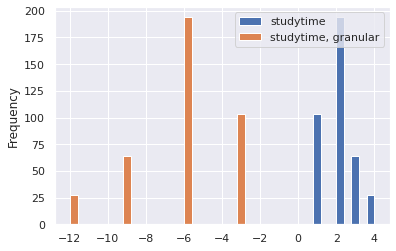

In [206]:
df[['studytime','studytime, granular']].plot(kind='hist',bins=40)
# the columns reversevly dublicate each other so we can drop one of them as reduntant 

In [230]:
df = df.drop(['studytime, granular'],axis=1)

In [231]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
121,GP,M,15,U,GT3,T,2.0,2.0,services,services,home,father,1.0,4.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,4.0,5.0,6.0,75.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
334,GP,F,18,R,GT3,T,2.0,2.0,at_home,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,yes,no,no,4.0,4.0,4.0,4.0,0.0,0.0
149,GP,M,15,U,LE3,NaN,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,NaN,no,no,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
300,GP,F,18,U,LE3,A,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,no,NaN,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
126,GP,F,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,yes,no,no,NaN,yes,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0


In [232]:
# score variable is the main one, so we can get rid of all empty rows
df.dropna(subset = ['score'], axis = 0, inplace = True)
df.reset_index(drop=True, inplace=True) #reset index since we removed 6 rows

In [149]:
df.isnull().sum()

school         0
sex            0
age            0
address       15
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        38
paid          39
activities    14
nursery       15
higher        20
internet      34
romantic      31
famrel        27
freetime       9
goout          7
health        15
absences      11
score          0
dtype: int64

['GP' 'MS']
['F' 'M']
[18 17 15 16 19 22 20 21]


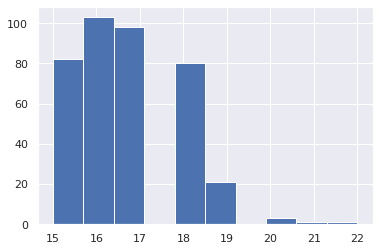

In [233]:
print(df.school.unique())
print(df.sex.unique())
print(df.age.unique())
df.age.hist()
df.age = df.age.astype(float)

In [234]:
df.famsize.value_counts()

GT3    255
LE3    107
Name: famsize, dtype: int64

In [235]:
df.apply(nan_fill)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
385,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
386,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
387,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [236]:
df.score.isnull().sum()

0

In [237]:
# let's try sweetviz library to generate interim report 
report = sv.analyze(df, target_feat = "score")
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [258]:
df_focus = df[df['score'] < 40]

<AxesSubplot:>

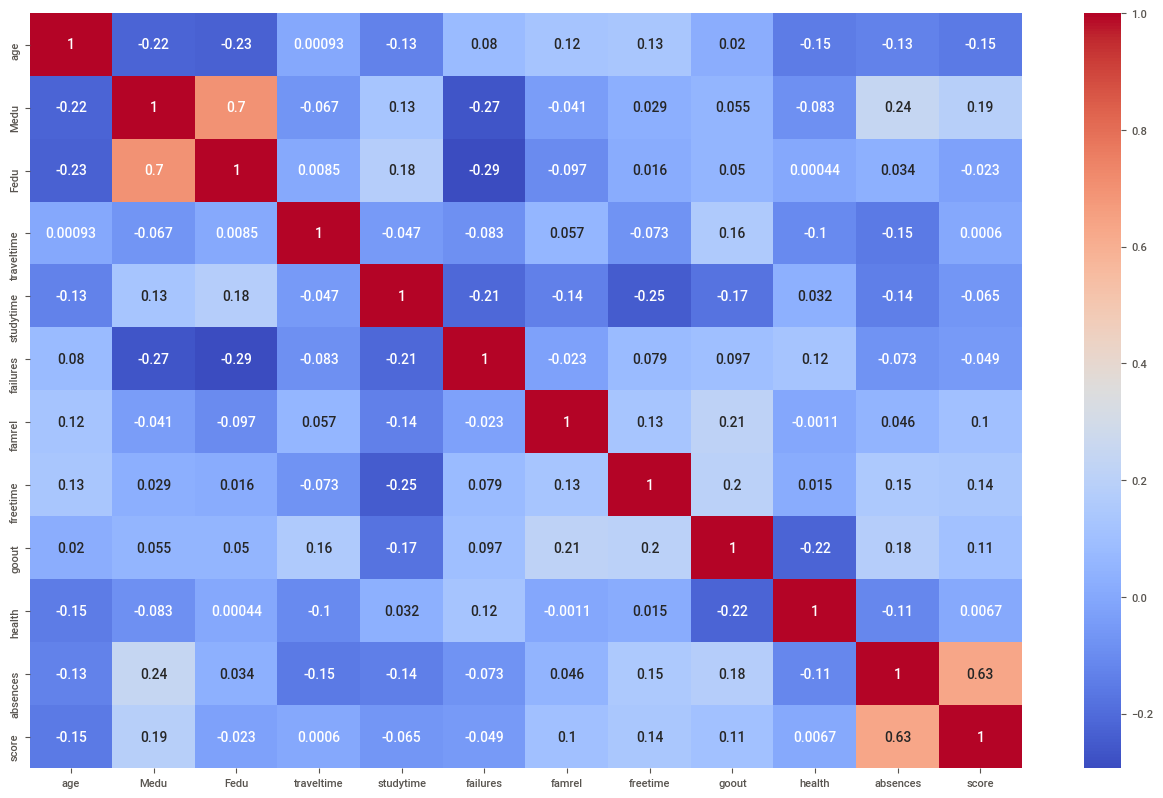

In [275]:
correlation = df_focus.corr()
plt.figure(figsize = (16,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='score', ylabel='absences'>

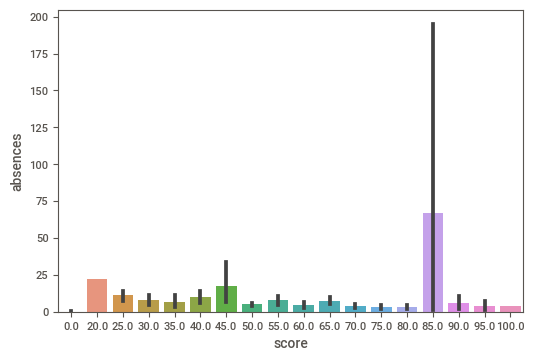

In [269]:
sns.barplot(x='score', y='absences', data=df)

221